<a href="https://colab.research.google.com/github/RubeRad/tcscs/blob/master/BubbleQuick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV Handling with Pandas

We have already started to learn about how `matplotlib` can be used to create excellent charts and graphs, but that was using datasets that were small enough to be typed directly into the notebook.

`pandas` is an elegant and efficient python module for slurping in arbitrarily large data files, and handling them by column *name* rather than by index *number* (i.e. pandas enables ***Literate Programming***)



In [42]:
# As usual, the first step is to import the required python libraries
import numpy             as np    # all kinds of numerical and matrix capabilities in here
import matplotlib.pyplot as plt   # this is for making charts and graphs
import pandas            as pd    # for convenient handling of csv files

## DataFrames
The top-level datatype in pandas is a `DataFrame`. Think of it as one spreadsheet tab from Google Sheets or Microsoft Excel.

When you ask `pandas` to read a data file, it returns a `DataFrame` object, so it is conventional to use a variable that has `df` in the name.

As usual in a python notebook, if we just mention a variable at the end of a cell, the notebook tries to show it to us. A `DataFrame` can be quite big, so usually it shows just a summary.

In [43]:
# csv = comma-separated-value is the most common/simple type of data file
# pandas can even reach out to URLs on the internet to slurp in data
df = pd.read_csv('https://raw.githubusercontent.com/RubeRad/tcscs/master/notebooks/BubbleQuick.csv')
df

,ALGORITHM,NUMBER OF ELEMENTS,NUMBER OF COMPARISONS,NUMBER OF SWAPS
0,QUICK,5,7,6
1,BUBBLE,5,10,7
2,QUICK,5,6,5
3,BUBBLE,5,10,8
4,BUBBLE,5,10,3
...,...,...,...,...
515,QUICK,30,124,121
516,BUBBLE,30,435,183
517,QUICK,30,132,130
518,BUBBLE,30,435,232


### DataFrames as Objects
I said above a `DataFrame` is an *object*. What it means to be an *object* in programming is to not just be a singular piece of data, but to have:
* *attributes* or *elements* -- an object is an organized collection of not just one, but many data elements
* *methods* or *functions* -- an object knows how to do certain things that are relevant to its nature

A simpler way to think of it, an object is a bag of nouns and verbs.

And like Plato's idealized concept of chair, the object *per se* is *abstract*. Every *instance* (concrete) of an object type has specific values of its attributes, and behaviors of its methods.

For instance, if there were a software object called `Dog`, some of its attributes might be `color`,  or `breed`, and some of its functions might be `speak()`, or `is_hungry()`. A variable `fluffy` that is a Dog object might have attribute values of `color='white'`, `breed='toy pomeranian'`, and its `speak()` method might return `'yip'`. A  variable `spike` that is also a Dog object might have attribute values of `color='black'`, `breed='doberman pinscher'`, and its `speak()` method might return `'GRRR!'`.   (For all dogs, the `is_hungry()` method probably always returns `True`.)

In python, you access/reference an attribute of a variable with a certain object type, by stating the name of the variable, then a `.`, then the name of the attribute. Here are a couple of the most interesting *attributes* of every `DataFrame` object:

In [44]:
df.shape    # (rows, columns)

(520, 4)

In [45]:
df.columns  # list of names of columns

Index(['ALGORITHM', 'NUMBER OF ELEMENTS', 'NUMBER OF COMPARISONS',
       'NUMBER OF SWAPS'],
      dtype='object')

Methods are not *accessed* or *referenced* as data that merely *is* something, but *invoked*, since they are functions that *do* something. Methods are invoked similarly to referencing attributes, but always with (). Methods can also accept input parameters inside the (), just like the "`bare functions`" we have already seen how to make in python with `def`.

Here are a few of methods of the DataFrame object:

In [46]:
df.describe()    # a statistical description of the contents

,NUMBER OF ELEMENTS,NUMBER OF COMPARISONS,NUMBER OF SWAPS
count,520.000000,520.000000,520.000000
mean,17.500000,120.394231,72.838462
std,7.507222,114.369564,55.452707
min,5.000000,6.000000,3.000000
25%,11.000000,36.000000,26.750000
50%,17.500000,78.000000,59.000000
75%,24.000000,155.750000,108.000000
max,30.000000,435.000000,250.000000


In [47]:
df.info()        # a more computer-science kind of description centered on data types and storage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ALGORITHM              520 non-null    object
 1   NUMBER OF ELEMENTS     520 non-null    int64 
 2   NUMBER OF COMPARISONS  520 non-null    int64 
 3   NUMBER OF SWAPS        520 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 16.4+ KB


Compare these three ways to print a selection of the data:

In [48]:
df.head()

,ALGORITHM,NUMBER OF ELEMENTS,NUMBER OF COMPARISONS,NUMBER OF SWAPS
0,QUICK,5,7,6
1,BUBBLE,5,10,7
2,QUICK,5,6,5
3,BUBBLE,5,10,8
4,BUBBLE,5,10,3


In [49]:
df.tail()

,ALGORITHM,NUMBER OF ELEMENTS,NUMBER OF COMPARISONS,NUMBER OF SWAPS
515,QUICK,30,124,121
516,BUBBLE,30,435,183
517,QUICK,30,132,130
518,BUBBLE,30,435,232
519,QUICK,30,125,125


In [50]:
df

,ALGORITHM,NUMBER OF ELEMENTS,NUMBER OF COMPARISONS,NUMBER OF SWAPS
0,QUICK,5,7,6
1,BUBBLE,5,10,7
2,QUICK,5,6,5
3,BUBBLE,5,10,8
4,BUBBLE,5,10,3
...,...,...,...,...
515,QUICK,30,124,121
516,BUBBLE,30,435,183
517,QUICK,30,132,130
518,BUBBLE,30,435,232


As you can see, `head()` and `tail()` default to showing the first/last 5 rows (you can put a different number into the () -- try it!); and just mentioning the `DataFrame` variable does a `head()` and a `tail()` -- all nicely formatted with bold and grey stripes for convenient reading in a Jupyter notebook.

## DataFrame columns
As we saw above, pandas is aware of the columns of the dataset, by their *names* (the string labels in the top row of the .csv file). You can refer to any particular column using square brackets, like this:

In [51]:
df['ALGORITHM']  # try all the available column names

0       QUICK
1      BUBBLE
2       QUICK
3      BUBBLE
4      BUBBLE
        ...  
515     QUICK
516    BUBBLE
517     QUICK
518    BUBBLE
519     QUICK
Name: ALGORITHM, Length: 520, dtype: object

### Column shorthand
Pandas has syntax magic that supports a shorthand notation like this: easier to type and read! More Literate!

In [54]:
df.ALGORITHM  # try all the available column names

0       QUICK
1      BUBBLE
2       QUICK
3      BUBBLE
4      BUBBLE
        ...  
515     QUICK
516    BUBBLE
517     QUICK
518    BUBBLE
519     QUICK
Name: ALGORITHM, Length: 520, dtype: object

The catch on that shorthand is, it doesn't work if the column names have spaces. But, column headers can be changed. Here's how:


In [59]:
coldict = {'ALGORITHM'             : 'ALG',
           'NUMBER OF ELEMENTS'    : 'N',
           'NUMBER OF COMPARISONS' : 'COMPS',
           'NUMBER OF SWAPS'       : 'SWAPS' }
df.rename(columns=coldict, inplace=True)
df

,ALG,N,COMPS,SWAPS
0,QUICK,5,7,6
1,BUBBLE,5,10,7
2,QUICK,5,6,5
3,BUBBLE,5,10,8
4,BUBBLE,5,10,3
...,...,...,...,...
515,QUICK,30,124,121
516,BUBBLE,30,435,183
517,QUICK,30,132,130
518,BUBBLE,30,435,232


A `DataFrame` column is also an object (technically the name of the object is `Series`, but since you find the names of the `Series` with the `DataFrame` attribute `columns`, we'll just call them columns). As an object, a column also has some useful methods. `describe()`, invoked on a column, behaves analogously to being invoked on a whole `DataFrame`:

In [60]:
# Now try it again with all the new compact column names
df.ALG

0       QUICK
1      BUBBLE
2       QUICK
3      BUBBLE
4      BUBBLE
        ...  
515     QUICK
516    BUBBLE
517     QUICK
518    BUBBLE
519     QUICK
Name: ALG, Length: 520, dtype: object

In [61]:
df.ALG.describe()  # try all the column names

count        520
unique         2
top       BUBBLE
freq         270
Name: ALG, dtype: object

Another very useful method available for column objects is `value_counts()` -- what is that explaining about the data?

In [62]:
df.ALG.value_counts() # try all the column names. When is value_counts() more/less useful?

BUBBLE    270
QUICK     250
Name: ALG, dtype: int64

## DataFrame column combination
One of the elementary uses for a spreadsheet is to populating a new column using cell formulas to combine columns that already exist. Analogously, pandas makes it very easy to create new columns from previous.

Derived columns will appear in the list of columns like the ones read from the raw data, and have all the same methods available.

In [63]:
# OPS is the column we really care most about!
df['OPS'] = df.COMPS + df.SWAPS # NOTE: column 'ops' doesn't exist yet so we can't use the shortcut

In [64]:
df.columns

Index(['ALG', 'N', 'COMPS', 'SWAPS', 'OPS'], dtype='object')

In [65]:
df.head()

,ALG,N,COMPS,SWAPS,OPS
0,QUICK,5,7,6,13
1,BUBBLE,5,10,7,17
2,QUICK,5,6,5,11
3,BUBBLE,5,10,8,18
4,BUBBLE,5,10,3,13


In [67]:
# Now that 'ops' is a column name (without spaces), shortcut use is available!!
df.OPS.describe()

count    520.000000
mean     193.232692
std      166.653997
min       10.000000
25%       63.000000
50%      146.000000
75%      264.500000
max      671.000000
Name: OPS, dtype: float64

In [68]:
df.OPS.value_counts()

84     6
16     5
25     5
23     5
76     5
      ..
301    1
343    1
334    1
353    1
250    1
Name: OPS, Length: 313, dtype: int64

## DataFrame rows and slicing
Perhaps the most powerful and flexible aspect of pandas is the ability to *slice* the data, allowing you to select any subset of the data you want to deal with.

Recall that `==` is asking a *question*. Before executing this next cell, consider, what would expect to be the answer to the question?

In [69]:
df.ALG == 'BUBBLE' # == is always a question. 
# What is it asking?
# What does the answer mean?

0      False
1       True
2      False
3       True
4       True
       ...  
515    False
516     True
517    False
518     True
519    False
Name: ALG, Length: 520, dtype: bool

What is the size of that thing which is the answer to the question? What does it mean?

We can catch the answer to the question in a variable. And then we can give that variable to the `DataFrame` object.

Pandas is clever enough to understand that, when we use square brackets to give it a single string, we want that column. But if we give it a list of booleans that is the same length as the number of rows of data, it will line up the Trues/Falses with the rows, and give us back just the rows that are True.

In [70]:
# We can catch the answer to the question in a variable
bubblerows = (df.ALG=='BUBBLE')

In [71]:
df[bubblerows]

,ALG,N,COMPS,SWAPS,OPS
1,BUBBLE,5,10,7,17
3,BUBBLE,5,10,8,18
4,BUBBLE,5,10,3,13
5,BUBBLE,5,10,5,15
6,BUBBLE,5,10,6,16
...,...,...,...,...,...
512,BUBBLE,30,435,199,634
513,BUBBLE,30,435,188,623
514,BUBBLE,30,435,181,616
516,BUBBLE,30,435,183,618


When pandas gives us back the selected rows (the requested 'slice' of the data), it gives us back another `DataFrame` object, and we can hold that sliced `DataFrame` in another variable.

In [72]:
df_bubble = df[bubblerows]

In [73]:
# Use this cell to examine the sliced DataFrame df_bubble
# in all the ways we learned about up top with the full DataFrame df




This slicing operation can also be done in a single python statement, like below. This is very common pattern, examine it closely and expect to do it a lot.

In [77]:
# notice this:   vvvvvvvvvvvvvvvvvv
df_bubble = df[  df.ALG == 'BUBBLE'  ]
# is the same as what we saved off into variable "bubblerows"
# This time, we just wrap that with df[  ]
# We get to skip a step, and one less variable hanging around
# (and one less variable we need to think of a Literate Programming name for)

In [78]:
# In this cell, create a DataFrame slice df_quick to go with df_bubble



Since `df_bubble` and `df_quick` are also `DataFrame` objects, they can also create new columns by combining other columns.

Recall that, for Bubble Sort, the expected number of total operations is `1.5*COMPS` (why?). So let's make a column `EXP` so we can compare it to the actual number of operations in column `OPS`.

In [79]:
df_bubble['EXP'] = df_bubble.COMPS * 1.5

/tmp/ipykernel_31828/922331059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble['EXP'] = df_bubble.COMPS * 1.5


Oopx! What happened there?

A slice is not (normally) a separate copy of the data. To avoid wasting memory, when pandas gives a slice `DataFrame`, it is like a lens or a prism, that sees just the right part of the original data.

When we try to create a new column in the *slice*, pandas says "Wait a minute, how am I supposed to deal with this back in the original full `DataFrame`? If there's a new column EXP for everybody, what am I supposed to do for EXP on all the rows that are not in this slice?

There are multiple ways to deal with this, but for now we'll take the easy road and just go ahead and be wasteful of memory. 

Go back up to the two cells that create the `df_bubble` and `df_quick` slices, and add a `.copy()` on the end.

After `df_bubble` has its EXP column defined, use the next cell to calculate EXP appropriately for `df_quick`:

In [80]:
# What is the EXPected number of QuickSort operations for N cards?
# Hint: numpy offers a log-base-2 function called np.log2()




## Pandas and Matplotlib -- a match made in heaven!
Here's the main point. `pandas` columns can be handed over to `matplotlib` to be either the x's or y's for data series to `plot()`!

NameError: name 'df_quick' is not defined

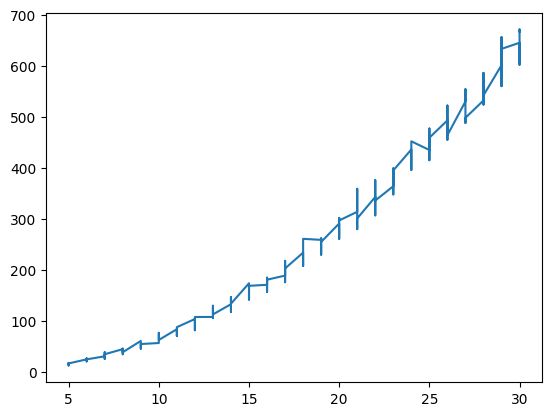

In [82]:
plt.figure()
ax = plt.gca()
ax.plot(df_bubble.N, df_bubble.OPS)
ax.plot(df_quick.N,  df_quick.OPS)
# plot both 'EXP' series as well!


# Homework

## Exercise I: Matplotlib styling review
Finish the ugly graph above:
* Add the EXPected series
* Rock the matplotlib styling to make it an excellent graph
  * (Feel free to refer back to the MatplotlibIntro notebook)


## Exercise II: Practice with slicing and plotting


In code cells below, do the following:
1. Make a slice of all the quicksort rows with N between 15 and 25
   1. Make a plot of x=N,y=OPS from the slice.
1. Make a slice of `df` (the original full `DataFrame`) of rows with OPS between 100 and 200. 
   1. Make a plot of N,OPS from the slice.
1. Make a new column in the original `df` called `SWAPS_PER_COMP` (df.SWAPS divided by df.COMPS)
   1. Or if you want, more concisely named `SPC`? 
   1. Recreate the df_bubble/df_quick slices (unfortunately, new columns added to the original `DataFrame` do not magically show up in `df_bubble` and `df_quick`). 
   1. Make a plot x=df.N and two data series, SWAPS_PER_COMP for bubblesort vs quicksort.
1. Make a plot of df_bubble actual vs expected, with different colors for points above/below the line:
   1. Make a slice from `df_bubble` for which OPS is less than EXP
   1. Make another slice for which OPS is more than EXP. 
   1. Make a plot with three series: EXPected line from `df_bubble`, and the under/over slices

Notes:
1. Above, we sliced `df` using `==` on the text-valued column `ALG`. In these exercises you will be slicing based on columns with numerical data, using comparators like `<` or `>=`. You will also need to use the logical operator `and`.
1. For each of these, you should think of a concise but not confusing variable name for the slice
1. None of these plots need to be pretty, just make sure they are scatter or line as appropriate.



In [83]:
# HWII.1 could start by slicing a slice, like this:
dfq_ge_15 =  df_quick[  df_quick.N >= 15 ]
dfq_15_25 = dfq_ge_15[ dfq_ge_15.N <= 25 ]

# But here's how to slice with multiple conditions in one step
# The () are very important! If you wanted OR instead of AND it would be | instead of &
df_q_15_25 = df_quick[  (df_quick.N >= 15) & (df_quick.N <= 25)  ]

NameError: name 'df_quick' is not defined